# CLASSIFY IMAGES (CIFAR-10) USING CNNs
### Aamir Hussain

# Problem Statement

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

# Data Preperation and Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
#Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

Using TensorFlow backend.


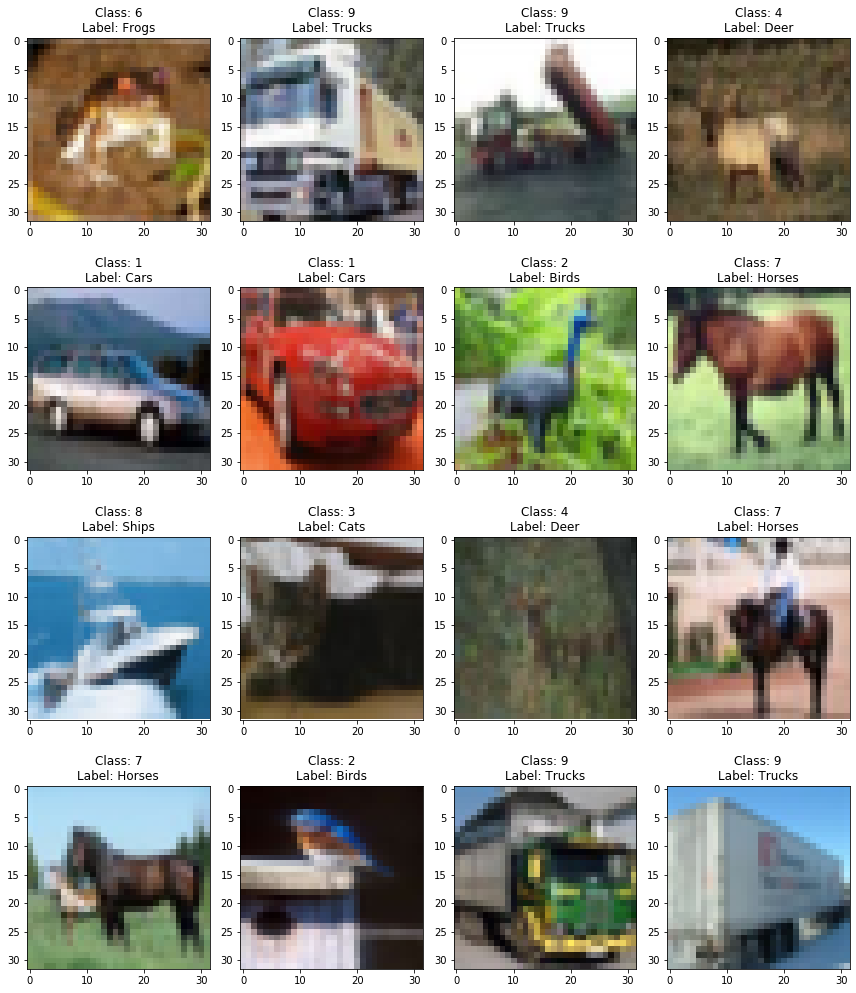

In [3]:
labels = ['Airplanes', 'Cars', 'Birds', 'Cats', 'Deer', 'Dogs', 'Frogs', 'Horses', 'Ships', 'Trucks']
plt.figure(figsize=(12,14))
for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    plt.title(f'Class: {y_train[i][0]}\nLabel: {labels[y_train[i][0]]}')
    plt.imshow(X_train[i])
plt.tight_layout()

# Model Without Data Augmentation

In [4]:
input_shape = X_train.shape[1:]
print(input_shape)

(32, 32, 3)


In [5]:
import keras
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [6]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.Input(shape=input_shape))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

In [7]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0

In [8]:
cnn.compile(optimizer= 'adam', loss='categorical_crossentropy', 
            metrics=['accuracy'])
r = cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5575 - accuracy: 0.4243 - val_loss: 1.2608 - val_accuracy: 0.5407
Epoch 2/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.1874 - accuracy: 0.5766 - val_loss: 1.0152 - val_accuracy: 0.6405
Epoch 3/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.0208 - accuracy: 0.6390 - val_loss: 0.9122 - val_accuracy: 0.6760
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9124 - accuracy: 0.6783 - val_loss: 0.9032 - val_accuracy: 0.6819
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8266 - accuracy: 0.7094 - val_loss: 0.7559 - val_accuracy: 0.7373
Epoch 6/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.7688 - accuracy: 0.7282 - val_loss: 0.8195 - val_accuracy: 0.7135
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7258 - accuracy: 0.7445 - val_loss: 0.7322 -

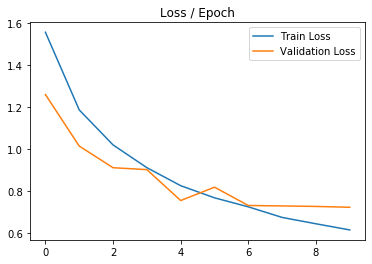

In [9]:
plt.title('Loss / Epoch')
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()

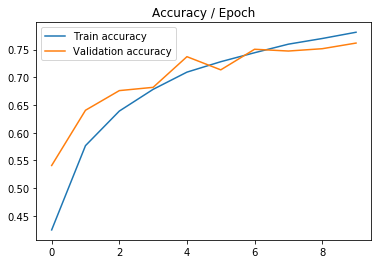

In [10]:
plt.title('Accuracy / Epoch')
plt.plot(r.history['accuracy'], label='Train accuracy')
plt.plot(r.history['val_accuracy'], label='Validation accuracy')
plt.legend()

In [12]:
score = cnn.evaluate(X_test, y_test)
print(f'Score: {score[1]}')

313/313 [==============================] - 3s 9ms/step - loss: 0.7238 - accuracy: 0.7619
Score: 0.761900007724762


# Model Improvement Using Data Augmentation

In [19]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

import keras
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

X_train = X_train / 255.0
X_test = X_test / 255.0

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                            )
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
validation_generator = test_datagen.flow(X_test, y_test, batch_size=32)

In [20]:
r = cnn.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.2078 - accuracy: 0.5718 - val_loss: 1.4364 - val_accuracy: 0.5293
Epoch 2/10
1563/1563 [==============================] - 63s 41ms/step - loss: 1.2026 - accuracy: 0.5733 - val_loss: 1.2277 - val_accuracy: 0.5699
Epoch 3/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.1999 - accuracy: 0.5764 - val_loss: 1.1954 - val_accuracy: 0.5951
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1873 - accuracy: 0.5832 - val_loss: 1.1191 - val_accuracy: 0.6145
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1869 - accuracy: 0.5836 - val_loss: 1.1288 - val_accuracy: 0.6108
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1684 - accuracy: 0.5887 - val_loss: 1.0940 - val_accuracy: 0.6157
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1697 - accuracy: 0.5906 - val_loss: 1.1186 -

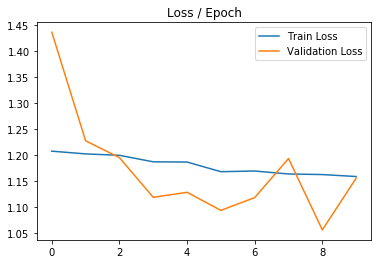

In [21]:
plt.title('Loss / Epoch')
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()

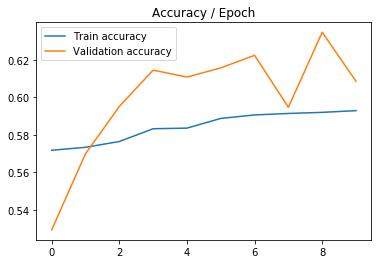

In [22]:
plt.title('Accuracy / Epoch')
plt.plot(r.history['accuracy'], label='Train accuracy')
plt.plot(r.history['val_accuracy'], label='Validation accuracy')
plt.legend()

In [23]:
score = cnn.evaluate(validation_generator)
print(f'Score: {score[1]}')

313/313 [==============================] - 4s 12ms/step - loss: 1.1559 - accuracy: 0.6085
Score: 0.6085000038146973


In [24]:
cnn.save('keras_cifar10_trained_model_Augmentation.h5')